In [2]:
import glob
import os

from itertools import combinations

from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [75]:
all_logs = glob.glob('./logs/*')

In [76]:
results = {
    'pooling_0': [],
    'pooling_1': [],
    'pooling_2__01': [],
    'pooling_2__10': [],
    'pooling_3': []
}

for f in tqdm(all_logs):
    txt = np.loadtxt(f)
    
    if 'pooling_0.csv' in f:    
        results['pooling_0'] += txt.tolist()
        
    elif 'pooling_1.csv' in f:
        results['pooling_1'] += txt.tolist()
    
    elif 'pooling_2.csv' in f:
        results['pooling_2__01'] += txt.tolist()
    
    elif 'pooling_2__init_10.csv' in f:
        results['pooling_2__10'] += txt.tolist()
        
    elif 'pooling_3__i' in f:
        results['pooling_3'] += txt.tolist()

100%|██████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 1091.93it/s]


In [78]:
df = pd.DataFrame(results)

In [81]:
df.columns = ['Sum', 'Avg', 'Lehmer 1', 'Lehmer 10', 'Max']

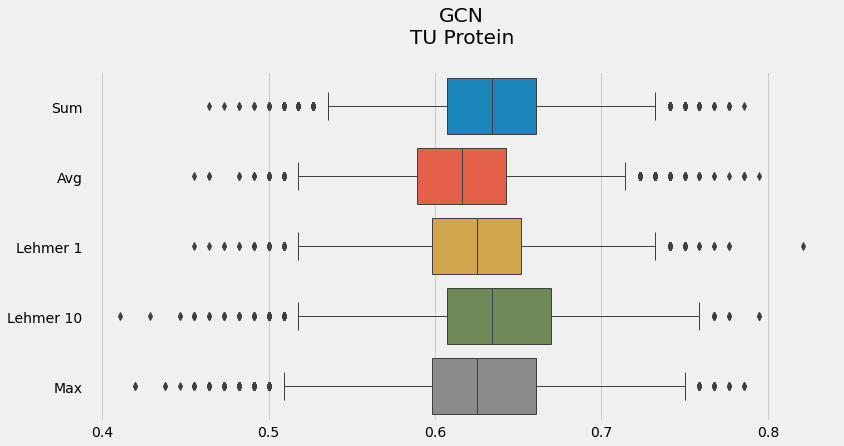

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, linewidth=1, orient='h')
plt.title('GCN\nTU Protein\n')
plt.show()

In [83]:
df.mean(axis=0).sort_values()

Avg          0.619948
Lehmer 1     0.622610
Max          0.626097
Sum          0.636557
Lehmer 10    0.637562
dtype: float64

In [88]:
df.median(axis=0).sort_values()

Avg          0.616071
Lehmer 1     0.625000
Max          0.625000
Sum          0.633929
Lehmer 10    0.633929
dtype: float64

In [84]:
stats.f_oneway(*[df[c] for c in df.columns])

F_onewayResult(statistic=330.4644885399795, pvalue=3.1674674830102576e-281)

In [85]:
stacked = []

for c in df.columns:
    stacked.append(pd.DataFrame({'values': df[c], 'iter': c}))
    
df_long = pd.concat(stacked)

In [86]:
mc = MultiComparison(df_long['values'], df_long['iter'])

In [87]:
print(mc.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
      Avg  Lehmer 1   0.0027  0.001  0.0009  0.0044   True
      Avg Lehmer 10   0.0176  0.001  0.0159  0.0193   True
      Avg       Max   0.0061  0.001  0.0044  0.0079   True
      Avg       Sum   0.0166  0.001  0.0149  0.0183   True
 Lehmer 1 Lehmer 10    0.015  0.001  0.0132  0.0167   True
 Lehmer 1       Max   0.0035  0.001  0.0018  0.0052   True
 Lehmer 1       Sum   0.0139  0.001  0.0122  0.0157   True
Lehmer 10       Max  -0.0115  0.001 -0.0132 -0.0098   True
Lehmer 10       Sum   -0.001 0.4974 -0.0027  0.0007  False
      Max       Sum   0.0105  0.001  0.0087  0.0122   True
----------------------------------------------------------


## Trajectories

In [50]:
trajectories = []

for log in all_logs:
    if 'trajectory__init_10.cs' in log:
        trajectories.append(np.loadtxt(log))

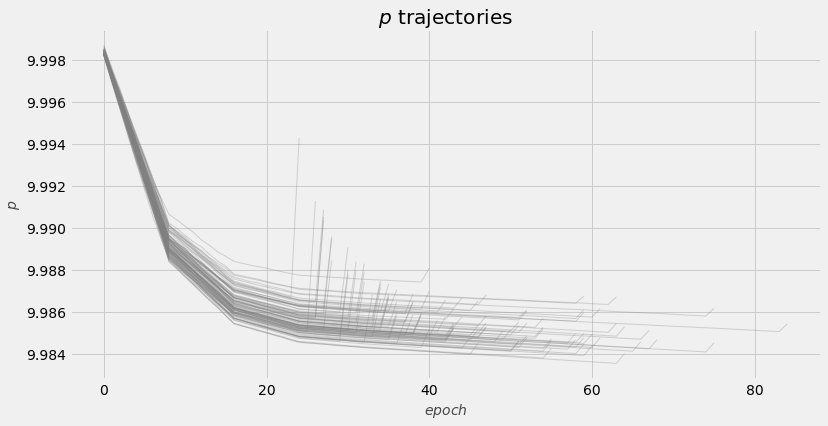

In [64]:
plt.figure(figsize=(12, 6))

for t in trajectories:
    plt.plot(t, alpha=.3, lw=1, color='gray')
    
plt.title('$p$ trajectories')
plt.xlabel('$epoch$', alpha=.7, fontsize=14)
plt.ylabel('$p$', alpha=.7, fontsize=14)
plt.show()

In [47]:
trajectories[0] == trajectories[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])